In [1]:
#Import required libraries
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#create dataframe from csv
df=pd.read_csv("C://Users//ssmay//Desktop//Housing assignment//train.csv")
#check datatypes for all columns
pd.options.display.max_rows = 500
#df.dtypes


In [3]:
df.shape

(1460, 81)

In [4]:
#No.of columns with all missing values
df.isnull().all(axis=0).sum()

0

In [5]:
#Check the column names with missing values
df.isnull().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#missing values in percentage
round(100*(df.isnull().sum()/len(df.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
#Columns with  80% missing values or more are non required columns
not_required_columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','LotFrontage']
#delete the columns
df.drop(not_required_columns,axis=1,inplace=True)
#Removing redundant columns as these columns same value in more than 80% of the records
#Removing YearBuilt and Exterior2nd as it contains almost same value as YearRemodAdd and Exterior1st respectively
Redundant_columns=['Id','Street','Utilities','LandSlope','Condition1','EnclosedPorch','3SsnPorch',
                   'ScreenPorch','BsmtFinSF2','LowQualFinSF','BsmtFullBath','BsmtHalfBath','Condition2','PoolArea','MSZoning',
                   'YearBuilt','RoofMatl','Exterior2nd','BsmtCond','Heating','CentralAir','Electrical','MiscVal','SaleCondition',
                   'FullBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive','SaleType','BsmtFinType2']
df.drop(Redundant_columns,axis=1,inplace=True)

In [8]:
#missing values in percentage
round(100*(df.isnull().sum()/len(df.index)),2)

MSSubClass      0.00
LotArea         0.00
LotShape        0.00
LandContour     0.00
LotConfig       0.00
Neighborhood    0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearRemodAdd    0.00
RoofStyle       0.00
Exterior1st     0.00
MasVnrType      0.55
MasVnrArea      0.55
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinSF1      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
HeatingQC       0.00
1stFlrSF        0.00
2ndFlrSF        0.00
GrLivArea       0.00
HalfBath        0.00
BedroomAbvGr    0.00
KitchenQual     0.00
TotRmsAbvGrd    0.00
Fireplaces      0.00
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCars      0.00
GarageArea      0.00
WoodDeckSF      0.00
OpenPorchSF     0.00
MoSold          0.00
YrSold          0.00
SalePrice       0.00
dtype: float64

In [9]:
#missing values in percentage
round(100*(df.isnull().sum()/len(df.index)),2)

MSSubClass      0.00
LotArea         0.00
LotShape        0.00
LandContour     0.00
LotConfig       0.00
Neighborhood    0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearRemodAdd    0.00
RoofStyle       0.00
Exterior1st     0.00
MasVnrType      0.55
MasVnrArea      0.55
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinSF1      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
HeatingQC       0.00
1stFlrSF        0.00
2ndFlrSF        0.00
GrLivArea       0.00
HalfBath        0.00
BedroomAbvGr    0.00
KitchenQual     0.00
TotRmsAbvGrd    0.00
Fireplaces      0.00
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCars      0.00
GarageArea      0.00
WoodDeckSF      0.00
OpenPorchSF     0.00
MoSold          0.00
YrSold          0.00
SalePrice       0.00
dtype: float64

In [10]:
#Deleting rowswith null values
df=df[~df.GarageType.isnull()]
df=df[~df.BsmtExposure.isnull()]
df=df[~df.MasVnrArea.isnull()]
df=df[~df.GarageYrBlt.isnull()]

In [11]:
#checking duplicates
df.duplicated().sum()

0

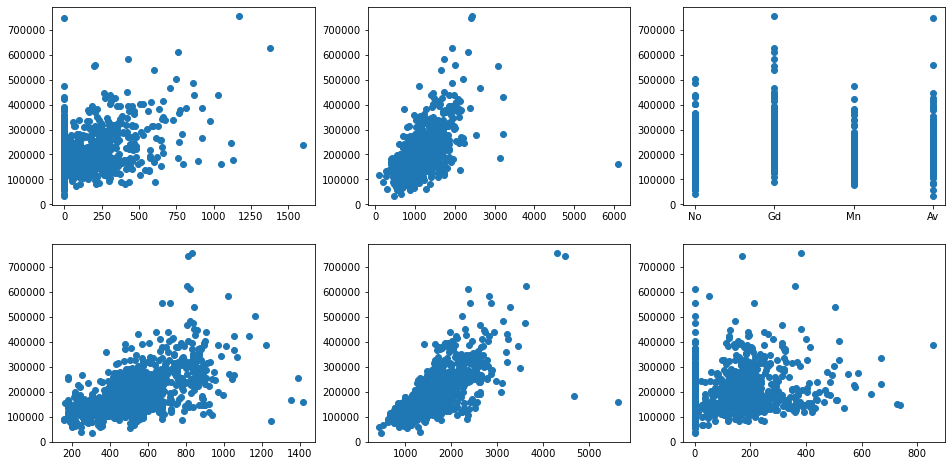

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['BsmtExposure'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice) #Higher the GrLivArea, higher the SalePrice
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

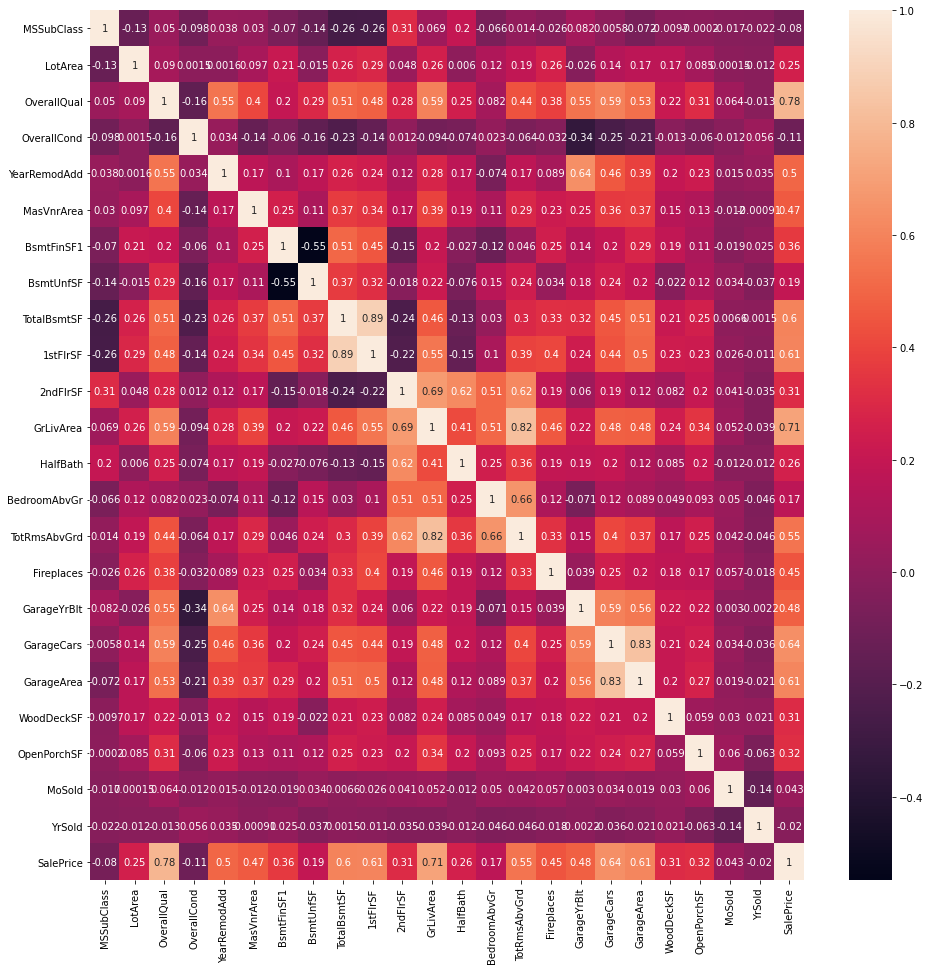

In [13]:
#Plotting heatmap to check correlation
plt.figure(figsize=(16,16))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [14]:
#Mapping categorical values to integer values
df.LotShape=df.LotShape.map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
df.ExterQual=df.ExterQual.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df.ExterCond=df.ExterCond.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df.BsmtQual=df.BsmtQual.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
df.BsmtExposure=df.BsmtExposure.map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
df.BsmtFinType1=df.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
df.HeatingQC=df.HeatingQC.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df.KitchenQual=df.KitchenQual.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df.GarageFinish=df.GarageFinish.map({'Fin':3,'RFn':2,'Unf':1,'NA':0})
df.MoSold=df.MoSold.map({1:'January', 2:'February', 3:'March', 4:'April',5:'May', 6:'June', 7:'July', 8:'August',9:'Septemper', 10:'October', 11:'November', 12:'December'})

In [15]:
Land_Contour=pd.get_dummies(df['LandContour'],drop_first=True)
df=pd.concat([df,Land_Contour],axis=1)
df=df.drop('LandContour',axis=1)
LotConfig1=pd.get_dummies(df['LotConfig'],drop_first=True)
df=pd.concat([df,LotConfig1],axis=1)
df=df.drop('LotConfig',axis=1)
Neighborhood1=pd.get_dummies(df['Neighborhood'],drop_first=True)
df=pd.concat([df,Neighborhood1],axis=1)
df=df.drop('Neighborhood',axis=1)
BldgType1=pd.get_dummies(df['BldgType'],drop_first=True)
df=pd.concat([df,BldgType1],axis=1)
df=df.drop('BldgType',axis=1)
HouseStyle1=pd.get_dummies(df['HouseStyle'],drop_first=True)
df=pd.concat([df,HouseStyle1],axis=1)
df=df.drop('HouseStyle',axis=1)
RoofStyle1=pd.get_dummies(df['RoofStyle'],drop_first=True)
df=pd.concat([df,RoofStyle1],axis=1)
df=df.drop('RoofStyle',axis=1)
Exterior1st1=pd.get_dummies(df['Exterior1st'],drop_first=True)
df=pd.concat([df,Exterior1st1],axis=1)
df=df.drop('Exterior1st',axis=1)
Foundation1=pd.get_dummies(df['Foundation'],drop_first=True)
df=pd.concat([df,Foundation1],axis=1)
df=df.drop('Foundation',axis=1)
GarageType1=pd.get_dummies(df['GarageType'],drop_first=True)
df=pd.concat([df,GarageType1],axis=1)
df=df.drop('GarageType',axis=1)
MasVnrType1=pd.get_dummies(df['MasVnrType'],drop_first=True)
df=pd.concat([df,MasVnrType1],axis=1)
df=df.drop('MasVnrType',axis=1)
MoSold1=pd.get_dummies(df['MoSold'],drop_first=True)
df=pd.concat([df,MoSold1],axis=1)
df=df.drop('MoSold',axis=1)

In [16]:
#Deriving variable for Age of buiding
today = date.today() 
AgeofBuilding_new=list(map(lambda x : int(today.year)-int(x),df.YearRemodAdd))                     
df = df.assign(AgeofBuilding=AgeofBuilding_new)
df=df.drop('YearRemodAdd',axis=1)
#Deriving variable for Age of garage
today = date.today() 
AgeofGarage_new=list(map(lambda x : int(today.year)-int(x),df.GarageYrBlt))                     
df = df.assign(AgeofGarage=AgeofGarage_new)
df=df.drop('GarageYrBlt',axis=1)
#Converting variable MasVnrArea to int
df.MasVnrArea=list(map(lambda x:int(x),df.MasVnrArea))

In [17]:
## Preparing the data for modelling

## Splitting into test and train data
df_train,df_test=train_test_split(df,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(937, 115)
(403, 115)


In [18]:
numvars=['MSSubClass','LotArea','LotShape','OverallQual','OverallCond','MasVnrArea','ExterQual','ExterCond',
         'BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF',
        '2ndFlrSF','GrLivArea','HalfBath','BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageFinish',
         'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','YrSold','AgeofBuilding','AgeofGarage','SalePrice']
scaler = MinMaxScaler()
df_train[numvars] = scaler.fit_transform(df_train[numvars])
df_test[numvars] = scaler.transform(df_test[numvars])

In [19]:
# Defining X_train and y_train
y_train=df_train.pop('SalePrice')
X_train=df_train
# Defining X_test and y_test
y_test=df_test.pop('SalePrice')
X_test=df_test

In [20]:
#Training the model
#Applying RFE for output number of variables 60
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,60)
rfe.fit(X_train,y_train)
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
print(lm.intercept_)
print(lm.coef_)

-0.1654501214614698
[-5.42141181e-02  1.10355783e-01  8.03164105e-04  1.16341819e-01
  5.72672275e-02  3.20910561e-02  2.55188890e-02 -1.18418214e-02
  4.12498537e-02  2.97318099e-02 -6.32644460e-04  2.35234864e-02
 -3.98349844e-02  1.45064704e-01  3.81862462e-03 -2.39057220e-01
 -5.05035434e-02  5.66727240e-01  1.57255638e-02 -4.26903987e-02
  3.18771534e-02  4.08914712e-02  1.52760264e-02  3.76415341e-03
  2.50020696e-02  1.58574695e-02  7.10132351e-03 -1.41269386e-02
 -1.39650844e-03  3.18934284e-02  3.47935226e-03  1.93677275e-02
  7.12558269e-03 -1.63538922e-02 -3.33863889e-02 -1.86571459e-03
  4.17948907e-03  3.62259367e-02  1.33575175e-02 -1.62230736e-03
 -6.86904654e-03  2.37975225e-02 -1.82852739e-02 -6.55505224e-03
 -1.23069368e-02  3.54177843e-02 -6.46440108e-04 -1.33333642e-02
  3.73660276e-02 -1.75441950e-02  5.60898355e-02  5.35606065e-02
 -1.82670187e-02 -1.20553369e-02 -9.01878952e-03 -3.15386321e-03
  2.43600961e-02  5.25405427e-02 -1.35115850e-02 -4.05236427e-03
  1.9

In [21]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
print(rfe_sel_columns)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'HLS', 'Lvl', 'FR2', 'FR3', 'Blueste', 'BrDale', 'BrkSide', 'Crawfor', 'MeadowV', 'NPkVill', 'NoRidge', 'NridgHt', 'Somerst', 'StoneBr', '2fmCon', 'Duplex', 'Twnhs', '1.5Unf', '1Story', '2.5Unf', 'SFoyer', 'SLvl', 'Gable', 'Gambrel', 'Hip', 'BrkComm', 'BrkFace', 'CBlock', 'ImStucc', 'Stone', 'Stone', 'Wood', 'CarPort', 'BrkFace', 'None', 'Stone', 'January', 'October']


In [22]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]


# Linear Regression

In [23]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)
metric=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)
mse_test_lr=mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8824398004660868
0.7577619840523108
1.3252393956726158
1.1624313360607708
0.001414343004986783
0.0028844450026321855


# Ridge method

In [24]:
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,
                 0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge=Ridge()
folds=5
model_cv=GridSearchCV(estimator=ridge,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                      verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [25]:
print(model_cv.best_params_)

{'alpha': 2.0}


In [26]:
alpha=2
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-0.04926576  0.06472725  0.1034884   0.04638424  0.04081525  0.04012006
  0.05560648  0.03443253  0.05237147 -0.00641792  0.0832442   0.05868549
  0.10157419  0.09641764  0.01679348 -0.02273003  0.03803681  0.04808945
  0.02245886  0.02764723  0.03021248 -0.00804146  0.0227247   0.01112541
 -0.01200561 -0.02013914  0.0064668   0.02338061  0.01826919  0.03024088
  0.01531555  0.01839571  0.06846476  0.05340129  0.02742985  0.04872489
  0.01043329 -0.0236696  -0.01179664  0.00531021  0.0179826  -0.02256687
  0.00875524  0.01805057  0.00547291  0.00423475  0.01021916 -0.02069441
  0.00801652  0.00263629  0.00688943 -0.00156096 -0.01630022 -0.00302803
 -0.00759782  0.00305621 -0.00302803 -0.00759782  0.00305621 -0.01454752
  0.00832758  0.00801652  0.00263629  0.01299497 -0.00302803 -0.00759782
  0.00305621  0.01040633 -0.01312683]


In [27]:
y_pred_train=ridge.predict(X_train)
y_pred_test=ridge.predict(X_test)

metric2=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)
mse_test_lr=mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8784960392988048
0.7734220708491647
1.3696968539512433
1.0872830338965653
0.001461789598667282
0.002697972788825224


# Lasso regression

In [28]:
lasso=Lasso()
model_cv=GridSearchCV(estimator=lasso,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                      verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [29]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [30]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
print(lasso.coef_)

[-4.46798528e-02  7.13512872e-02  1.18223528e-01  4.53940716e-02
  3.54342702e-02  3.31477327e-02  5.55758652e-02  3.37003220e-02
  5.64121370e-02 -1.47192136e-03  9.47149576e-02  0.00000000e+00
  6.54702996e-02  1.93530054e-01  1.32645946e-02 -1.79974307e-02
  3.57052510e-02  3.09618952e-02  1.83323766e-02  2.62572787e-02
  2.66799791e-02 -2.80071659e-03  2.05733864e-02  1.08416392e-02
 -9.02837605e-03 -6.73719120e-03  0.00000000e+00  1.18812604e-02
  1.51327679e-02  2.93801818e-02  0.00000000e+00  4.65431607e-03
  6.63314049e-02  5.30833225e-02  2.43562224e-02  4.63953955e-02
  2.97378601e-03 -2.16237617e-02 -7.81055666e-03  0.00000000e+00
  1.67572730e-02 -1.69632337e-02  2.97785850e-03  1.55896036e-02
 -0.00000000e+00  0.00000000e+00  4.02859379e-03 -0.00000000e+00
  3.65196062e-03 -4.77010322e-04  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  9.12032353e-04
 -0.00000000e+00 -0.00000000e+00  6.01156135e-07 -0.00000000e+00
  0.00000000e+00  8.50727

In [31]:
y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)

metric3=[]
r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train,y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)
mse_test_lr=mean_squared_error(y_test,y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.8768474366614308
0.7698471545731158
1.388281316818095
1.1044380402518448
0.0014816236038613607
0.002740541042808548


# Final comparison

In [32]:
lr_table={'Metric':['R2 Score(Train)','R2 Score(Test)','RSS(Train)','RSS(Test)','MSE(Train)','MSE(Test)'],
          'Linear Regression':metric}
lr_metric=pd.DataFrame(lr_table , columns=['Metric','Linear Regression'] )
rg_metric=pd.Series(metric2,name='Ridge Regression')
ls_metric=pd.Series(metric3,name='Lasso Regression')
final_metric=pd.concat([lr_metric,rg_metric,ls_metric],axis=1)
print(final_metric)

            Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score(Train)           0.882440          0.878496          0.876847
1   R2 Score(Test)           0.757762          0.773422          0.769847
2       RSS(Train)           1.325239          1.369697          1.388281
3        RSS(Test)           1.162431          1.087283          1.104438
4       MSE(Train)           0.037608          0.038233          0.038492
5        MSE(Test)           0.053707          0.051942          0.052350


In [33]:
# As the values of R2 Score is almost same for all the regression. But the Ridge regression fits better in the model 
#as it gives best R2 score for the modelfor train and test data both. Also, RSS and MSE values are lowest for Ridge regression. 
#Therefore, I am going to consider Ridge regression as my final model

In [36]:
ridge = Ridge(alpha=2)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8784960392988048
0.7734220708491647


In [35]:
#Best alpha value for lasso is 0.0001
#Best alpha value for Ridge is 2
# As observed, the data set can be best explained by below features:
#GrLivArea
#OverallQual
#BsmtFinSF1
#BsmtQual
#NridgHt